転移学習によるCIFAR10の分類(失敗)

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets,transforms,models
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
val_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),#ランダムに反転
    transforms.ColorJitter(),#ランダムに色調を変化させる
    transforms.RandomRotation(10),#ランダムに回転(角度)
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_dataset=datasets.CIFAR10(root="./data",train=True,download=True,transform=train_transform)
validation_dataset=datasets.CIFAR10(root="./data",train=False,download=True,transform=val_transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
names=("plane","car","bird","cat","deer","dog","flog","horse","ship","truck")

In [ ]:
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
validation_dataloader=DataLoader(validation_dataset,batch_size=32,shuffle=False)

In [ ]:
data_iter=iter(train_dataloader)

In [ ]:
imgs,labels=next(data_iter)

In [ ]:
labels

tensor([5, 1, 8, 3, 3, 0, 8, 5, 1, 4, 7, 3, 2, 5, 3, 2, 1, 5, 9, 5, 5, 3, 7, 8,
        5, 3, 9, 9, 9, 4, 5, 4])

In [ ]:
imgs.size()#[バッチ数,チャネル,h,w]

torch.Size([32, 3, 32, 32])

In [ ]:
img=imgs[0]

In [ ]:
img_permute=img.permute(1,2,0)

In [ ]:
img_permute=0.5*img_permute+0.5#明るさ調整

In [ ]:
img_permute=np.clip(img_permute,0,1)

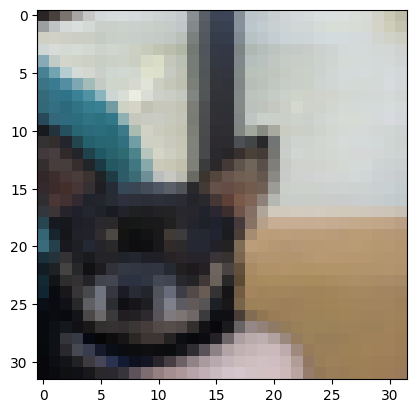

In [ ]:
plt.imshow(img_permute)

In [ ]:
model=models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in model.parameters():
    param.requires_grad=False

In [ ]:
model.fc=nn.Linear(512,10)#10この分類のため

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.fc.parameters(),lr=0.001)#weight_decay:重みづけが大きくなりすぎないようにするオプション

In [ ]:
num_epochs = 15
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc.cpu())
    #
    # validation loop
    #
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float())
    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc.cpu())
    print("epoch: {}, loss: {}, acc: {},val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

epoch: 0, loss: 2.109170899510155, acc: 0.2438419759273529,val loss: 1.8742188081954614, val acc: 0.3415535092353821
epoch: 1, loss: 1.8632781127287803, acc: 0.3402511179447174,val loss: 1.7729530048827393, val acc: 0.38268768787384033
epoch: 2, loss: 1.7994986160092832, acc: 0.36376360058784485,val loss: 1.7253418757130925, val acc: 0.3975639045238495
epoch: 3, loss: 1.7671182934321126, acc: 0.3767394423484802,val loss: 1.7067181805071359, val acc: 0.4038538336753845
epoch: 4, loss: 1.7458369718937254, acc: 0.3845369517803192,val loss: 1.6879207752764034, val acc: 0.4109424948692322
epoch: 5, loss: 1.730909164944903, acc: 0.3903750777244568,val loss: 1.6735433995152433, val acc: 0.41743209958076477
epoch: 6, loss: 1.7175813508354085, acc: 0.3977726995944977,val loss: 1.6649629738384162, val acc: 0.41992810368537903
epoch: 7, loss: 1.7106074807129834, acc: 0.3966730535030365,val loss: 1.6575610538641103, val acc: 0.41942891478538513
epoch: 8, loss: 1.710445081966471, acc: 0.40275111794

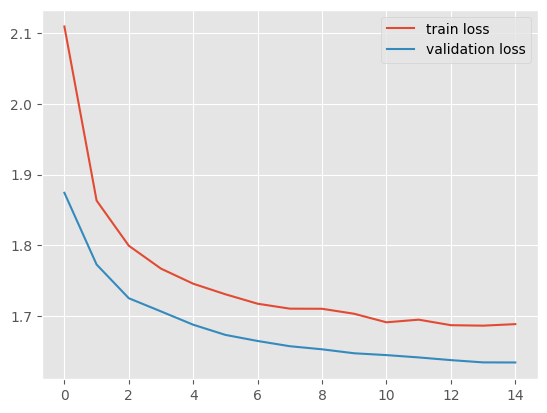

In [ ]:
plt.style.use("ggplot")
plt.plot(losses,label="train loss")
plt.plot(val_losses,label="validation loss")
plt.legend()

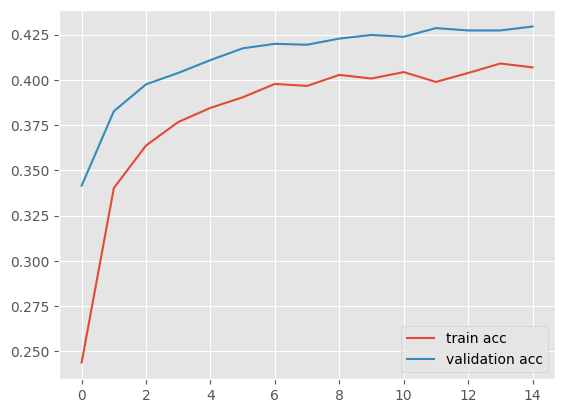

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs],label="train acc")
plt.plot([val_accs_.cpu() for val_accs_ in val_accs],label="validation acc")
plt.legend()